# Desafio Análise de dados com Python e Pandas
#### Este projeto é destinado a análise e manipulação de dados de duas bases de dados:
* A primeira base de dados contem arquivos no formato xlsx com informações sobre vendas de produtos de lojas em algumas cidades do nordeste.  
* A segunda base de dados  contem um arquivo com o nome "AdventureWorks" no formato xlsx  com informações sobre vendas de um produto entre diferentes lojas separadas por um ID correspondente.

####  As análises serão realizadas com a biblioteca pandas e também para a visualização dos dados usaremos a biblioteca matplotlib

In [799]:
#Importando a biblioteca
import pandas as pd

## Análise de dados para a primeira base de dados
#### Base de dados:
* Aracaju.xlsx
* Aracaju.xlsx
* Natal.xlsx
* Recife.xlsx
* Salvador.xlsx

In [800]:
#Leitura dos arquivos
df1 = pd.read_excel("dataset/Aracaju.xlsx")
df2 = pd.read_excel("dataset/Aracaju.xlsx")
df3 = pd.read_excel("dataset/Natal.xlsx")
df4 = pd.read_excel("dataset/Recife.xlsx")
df5 = pd.read_excel("dataset/Salvador.xlsx")

In [801]:
type(df1)

pandas.core.frame.DataFrame

In [802]:
#concatenar os dataframes
df = pd.concat([df1,df2,df3,df4,df5])

In [803]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


#### Análise exploratória de dados



In [804]:
print("Quantidade de valores missing:")
print(df.isnull().sum())

print("-"*30)

print("Tipo de dado de cada coluna:")

print(df.dtypes)

Quantidade de valores missing:
Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64
------------------------------
Tipo de dado de cada coluna:
Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object


In [805]:
#Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [806]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [807]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"] 

In [808]:
#Retornando as 5 maiores receita

df.nlargest(5, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.00,853,4,"3,544.00",4.00
51,Natal,2018-01-21,859.00,852,4,"3,436.00",4.00
55,Natal,2019-01-08,859.00,854,4,"3,436.00",4.00
30,Natal,2018-10-02,856.00,853,4,"3,424.00",4.00
41,Natal,2018-05-20,835.00,852,4,"3,340.00",4.00


In [809]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.00,853,4,"3,544.00",4.00
51,Natal,2018-01-21,859.00,852,4,"3,436.00",4.00
55,Natal,2019-01-08,859.00,854,4,"3,436.00",4.00
30,Natal,2018-10-02,856.00,853,4,"3,424.00",4.00
41,Natal,2018-05-20,835.00,852,4,"3,340.00",4.00
10,Natal,2018-10-27,828.00,852,4,"3,312.00",4.00
38,Natal,2018-02-25,828.00,852,4,"3,312.00",4.00
69,Natal,2019-03-24,817.00,852,4,"3,268.00",4.00
62,Natal,2018-02-10,793.00,854,4,"3,172.00",4.00
52,Natal,2018-04-27,778.00,854,4,"3,112.00",4.00


In [810]:
#Transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [811]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018             164,452.82
2019             192,804.44
Name: Receita, dtype: float64

In [812]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

df["mes_venda"] = df["Data"].dt.month

df["dia_venda"] = df["Data"].dt.day

In [813]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
119,Natal,2019-01-02,136.37,1034,2,272.74,2.00,2019,1,2
101,Salvador,2019-01-01,32.28,1035,3,96.84,3.00,2019,1,1
96,Natal,2019-01-02,42.94,1034,3,128.82,3.00,2019,1,2
97,Salvador,2019-01-01,39.91,1037,3,119.73,3.00,2019,1,1
66,Recife,2019-01-01,14.59,983,7,102.13,7.00,2019,1,1


In [814]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [815]:
#Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [816]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [817]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [818]:
vendas_marco_19.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
69,Natal,2019-03-24,817.00,852,4,"3,268.00",4.00,2019,3,24,447 days,1
4,Natal,2019-03-09,699.00,853,3,"2,097.00",3.00,2019,3,9,432 days,1
114,Recife,2019-03-02,16.82,983,4,67.28,4.00,2019,3,2,425 days,1
135,Salvador,2019-03-02,9.95,1037,3,29.85,3.00,2019,3,2,425 days,1
129,Salvador,2019-03-02,125.66,1037,1,125.66,1.00,2019,3,2,425 days,1
110,Salvador,2019-03-02,185.93,1036,3,557.79,3.00,2019,3,2,425 days,1
119,Salvador,2019-03-02,136.37,1034,2,272.74,2.00,2019,3,2,425 days,1
126,Salvador,2019-03-02,41.69,1036,2,83.38,2.00,2019,3,2,425 days,1
132,Recife,2019-03-02,17.49,983,5,87.45,5.00,2019,3,2,425 days,1
124,Recife,2019-03-02,47.98,983,7,335.86,7.00,2019,3,2,425 days,1


#### Visualização dos dados

In [819]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1522     82
1520     78
1034     67
1523     58
983      52
1521     42
982      34
980      31
852      29
854      28
853      26
981      25
Name: LojaID, dtype: int64

In [820]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

<AxesSubplot:>

In [821]:
#Gráfico de barras horizontais
df["LojaID"].value_counts().plot.barh()

<AxesSubplot:>

In [822]:
#Gráfico de barras horizontais
df["LojaID"].value_counts().plot.barh()

<AxesSubplot:>

In [823]:
#Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

<AxesSubplot:ylabel='Receita'>

In [824]:
#Total vendas por cidade
df["Cidade"].value_counts()

Aracaju     260
Natal       240
Salvador    240
Recife      142
Name: Cidade, dtype: int64

In [825]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [826]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [827]:
#Alterando o estilo
plt.style.use("ggplot")

In [828]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total Produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [829]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2525
2      121
3      297
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [830]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

In [831]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1212
2     105
3     290
4      12
Name: Qtde, dtype: int64

In [832]:
#Total produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [833]:
#Hisograma
plt.hist(df["Qtde"], color="orangered");

In [834]:
#Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")

# Analise para a segunda base de dados 

* dataset: AdventureWorks.xlsx

In [835]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [836]:
df = pd.read_excel("dataset/AdventureWorks.xlsx")
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [837]:
print('Quantidade de linhas e colunas:')
print(df.shape)
print('-'*32)

print('Tipos de dados:')
print(df.dtypes)

Quantidade de linhas e colunas:
(904, 16)
--------------------------------
Tipos de dados:
Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object


In [838]:
print('Receita total:')
print(df["Valor Venda"].sum())

Receita total:
5984606.1426


In [839]:
 #Criando a coluna de custo
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"])

print('Custo Total')
round(df["custo"].sum(), 2)

Custo Total


2486783.05

In [840]:
#criar uma coluna de Lucro que será Receita - Custo
df["lucro"]  = df["Valor Venda"] - df["custo"] 

print('Total Lucro')
round(df["lucro"].sum(),2)

Total Lucro


3497823.09

In [841]:
#Coluna com total de dias para enviar o produto
df["Tempo_envio"] = df["Data Envio"] - df["Data Venda"]



In [842]:
#Extraindo apenas os dias
df["Tempo_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

#Verificando o tipo da coluna Tempo_envio
df["Tempo_envio"].dtype

print('Média do tempo de envio por Marca:')
df.groupby("Marca")["Tempo_envio"].mean()



Média do tempo de envio por Marca:


Marca
Adventure Works                   8.66
Contoso                           8.47
Fabrikam                          8.51
Name: Tempo_envio, dtype: float64

In [843]:
#Verificando se temos dados faltantes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
Tempo_envio       0
dtype: int64

In [844]:
#Vamos Agrupar por ano e marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

pd.options.display.float_format = '{:20,.2f}'.format

print("Lucro por marca")
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()
lucro_ano


Lucro por marca


,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [845]:
print('total de produtos vendidos')
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

total de produtos vendidos


Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

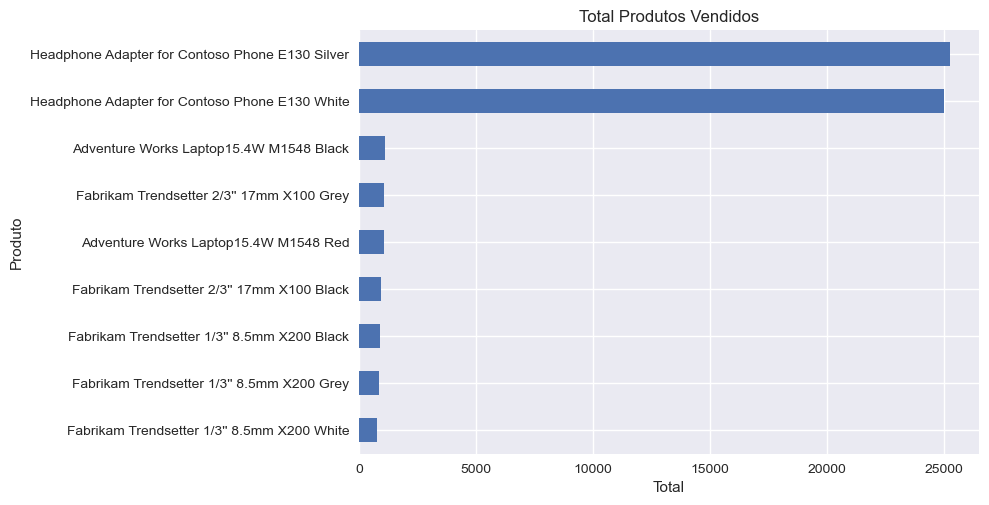

In [856]:
#Gráfico Total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");
plt.show()

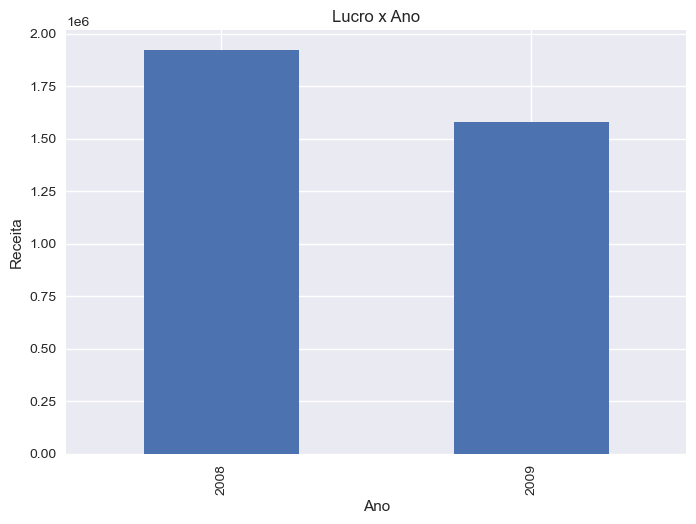

In [847]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.bar(title="Lucro x Ano")
#plt.figure(3)
plt.xlabel("Ano")
plt.ylabel("Receita");
plt.show()

In [848]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum()

#Selecionando apenas as vendas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]

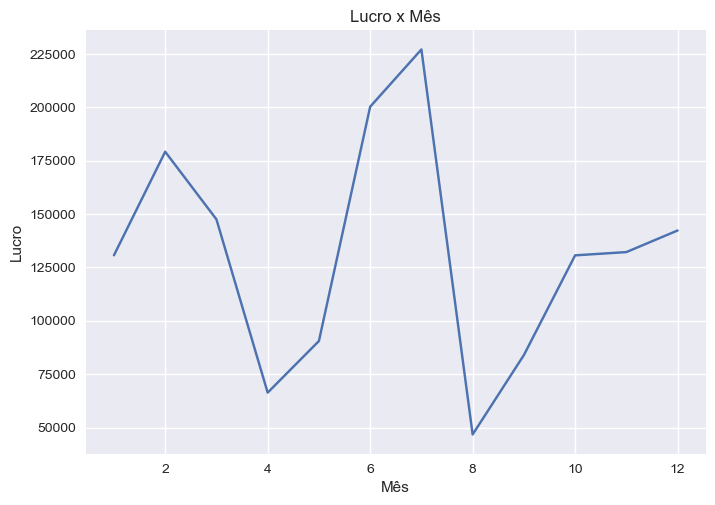

In [849]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");
plt.show()

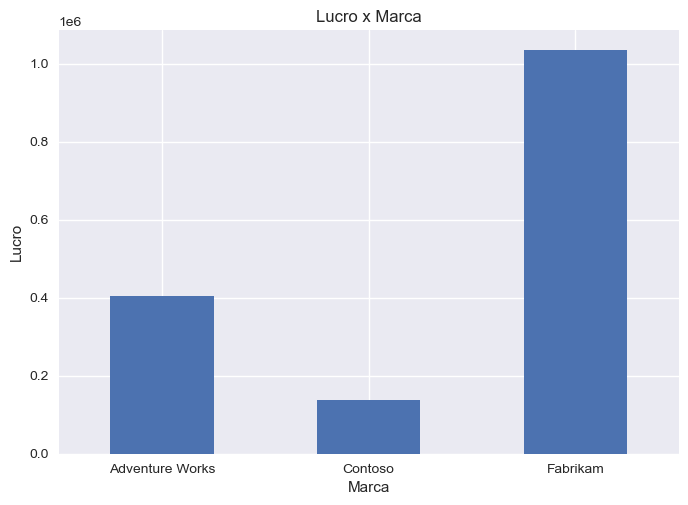

In [850]:
df_2009.groupby("Marca")["lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');
plt.show()

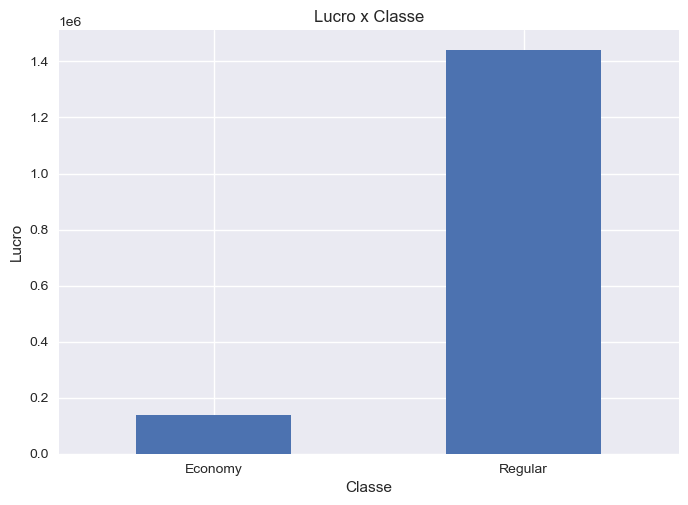

In [851]:
df_2009.groupby("Classe")["lucro"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

plt.show()

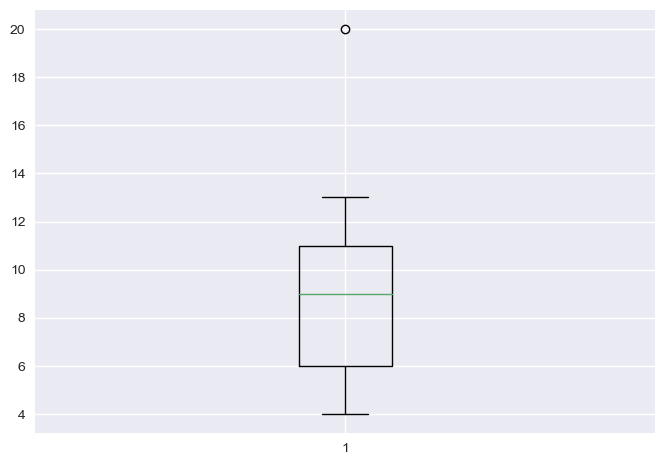

In [852]:
df["Tempo_envio"].describe()

#Gráfico de Boxplot
plt.boxplot(df["Tempo_envio"]);
plt.show()

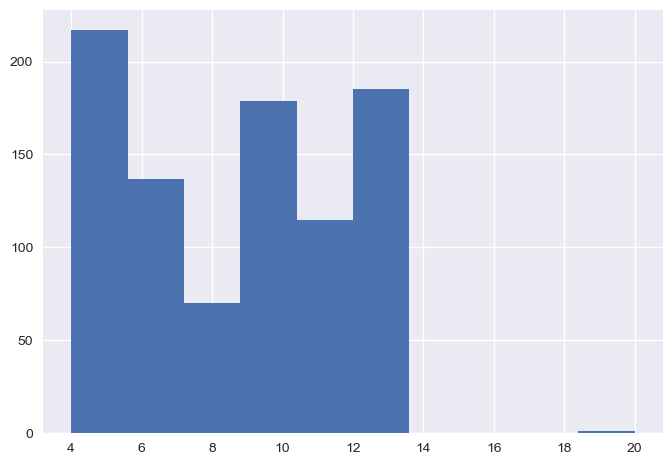

In [853]:
#Histograma
plt.hist(df["Tempo_envio"]);
plt.show()

In [854]:
#Tempo mínimo de envio
df["Tempo_envio"].min()

#Tempo máximo de envio
df['Tempo_envio'].max()

print('Identificando o Outlier')
df[df["Tempo_envio"] == 20]

Identificando o Outlier


,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [ ]:

pd.set_option('display.float_format', lambda x : '%.2f' % x)

In [855]:
df.to_csv("df_vendas_novo.csv", index=False)